In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.ndimage import convolve

```markdown
### Q01
```

In [9]:
# Function to apply intensity transformation to a single pixel
def transform_pixel_intensity(pixel_value: int):
    # Apply a linear transformation for pixel values in the range [50, 150]
    if 50 <= pixel_value <= 150:
        return 155 / 100 * pixel_value + 22.5
    else:
        return pixel_value

# Function to apply intensity transformation to the entire image
def apply_intensity_transformation(image: np.ndarray):
    transformed_image = np.zeros(image.shape, dtype=np.uint8)

    # Iterate over each pixel and apply the transformation
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            transformed_image[row, col] = transform_pixel_intensity(image[row, col])
    
    return transformed_image

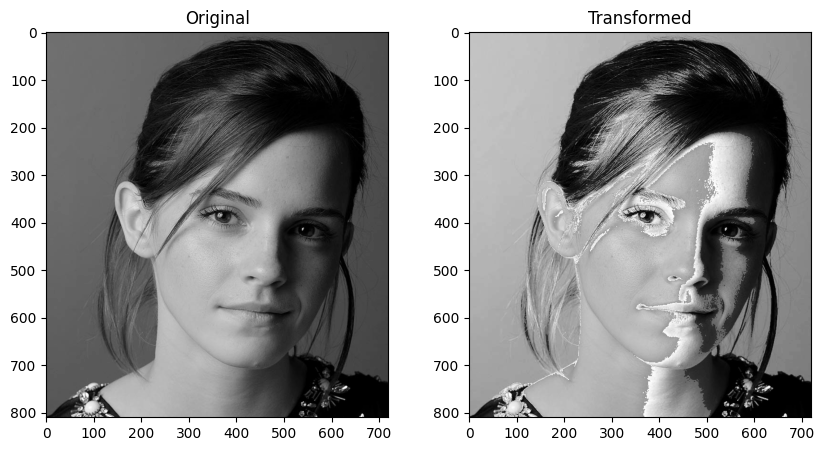

In [12]:
# Load the grayscale image
img = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Apply the intensity transformation function to the image
transformed_img = apply_intensity_transformation(img)

# Plot the original and transformed images 
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Transformed")
plt.imshow(transformed_img, cmap='gray')

plt.show()

```markdown
### Q02
```

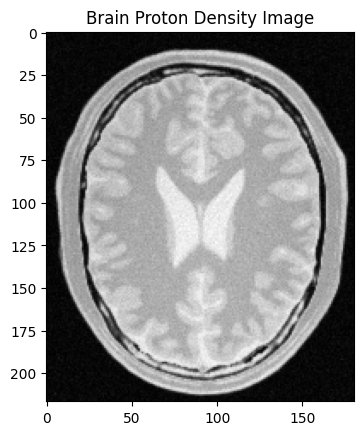

(217, 181)


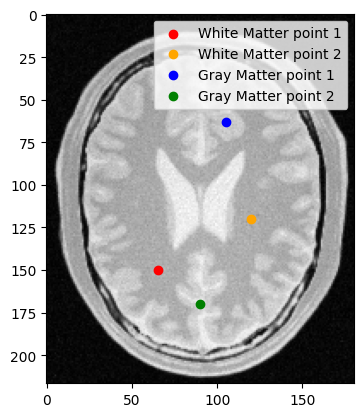

White Matter Intensity of white matter point 1 : 171
Gray Matter Intensity gray matter point 1: 190
White Matter Intensity of white matter point 2 : 182
Gray Matter Intensity gray matter point 2: 216


In [38]:
# Load the brain proton density image
brain_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(brain_img, cmap='gray')
plt.title("Brain Proton Density Image")
plt.show()

# Print the shape of the image
print(brain_img.shape)  # Output: (217, 181)

# Define points for white and gray matter
wm_point_1 = (65, 150)
wm_point_2 = (120, 120)
gm_point_1 = (105, 63)
gm_point_2 = (90, 170)


# Show points on the brain image
plt.imshow(brain_img, cmap="gray")
plt.scatter(*wm_point_1, color='red', label='White Matter point 1')
plt.scatter(*wm_point_2, color='orange', label='White Matter point 2')
plt.scatter(*gm_point_1, color='blue', label='Gray Matter point 1')
plt.scatter(*gm_point_2, color='green', label='Gray Matter point 2')
plt.legend()
plt.show()

# Extract pixel intensities
# Switch (x, y) to (y, x) for extracting pixel values
wm_intensity_1 = brain_img[wm_point_1[1], wm_point_1[0]] 
gm_intensity_1 = brain_img[gm_point_1[1], gm_point_1[0]]  
wm_intensity_2 = brain_img[wm_point_2[1], wm_point_2[0]]  
gm_intensity_2 = brain_img[gm_point_2[1], gm_point_2[0]]  

# Print pixel intensities
print(f"White Matter Intensity of white matter point 1 : {wm_intensity_1}")
print(f"Gray Matter Intensity gray matter point 1: {gm_intensity_1}")
print(f"White Matter Intensity of white matter point 2 : {wm_intensity_2}")
print(f"Gray Matter Intensity gray matter point 2: {gm_intensity_2}")

In [36]:
print(f"Image min intensity: {brain_img.min()}, max intensity: {brain_img.max()}")


Image min intensity: 0, max intensity: 251


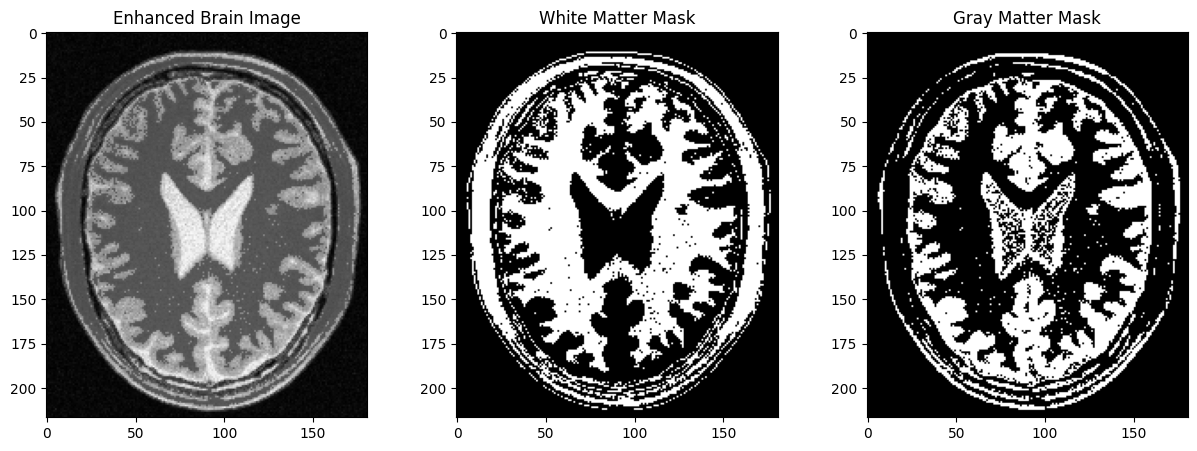

In [93]:
# Function to enhance white and gray matter in the brain image
def accentuateMatter(image):
    img_copy = np.copy(image)
    
     # Enhance gray matter (183 <= pixel <= 230)
    gray_mask = (image >= 183) & (image <= 230)
    img_copy[gray_mask] = 2 * image[gray_mask] + 20
    
    # Enhance white matter (100 <= pixel <= 182)
    white_mask = (image >= 100) & (image <= 182)
    img_copy[white_mask] = 0.5 * image[white_mask] 
    
    return img_copy, white_mask, gray_mask

# Load the brain image
brain_img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Apply the enhancement
enhanced_img, white_mask, gray_mask = accentuateMatter(brain_img)

# Display the transformed image
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(enhanced_img, cmap='gray')
plt.title("Enhanced Brain Image")

# Display the white matter mask
plt.subplot(1, 3, 2)
plt.imshow(white_mask, cmap='gray')
plt.title("White Matter Mask")

# Display the gray matter mask
plt.subplot(1, 3, 3)
plt.imshow(gray_mask, cmap='gray')
plt.title("Gray Matter Mask")

plt.show()

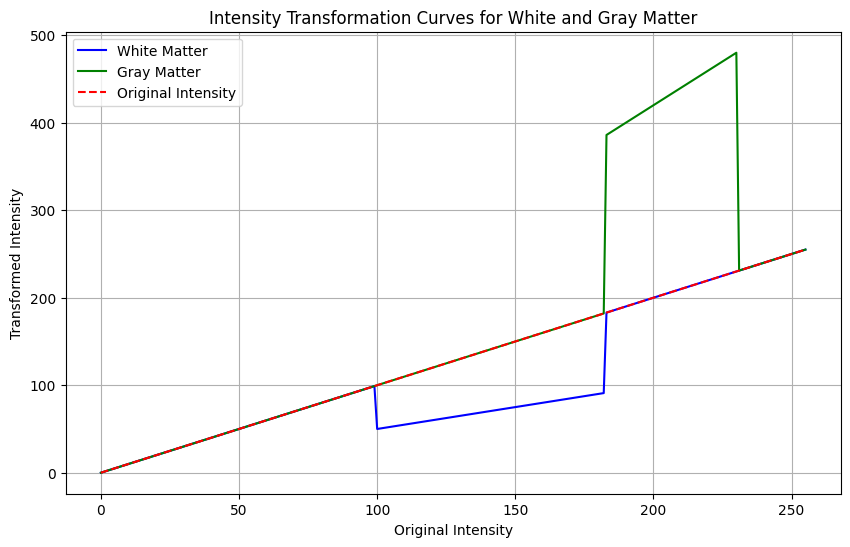

In [94]:
intensities = np.arange(256)

# Apply transformations to white and gray matter based on intensity ranges
gray_transformed = np.array([2 * i + 20 if 183 <= i <= 230 else i for i in intensities])
white_transformed = np.array([0.5 * i if 100 <= i <= 182 else i for i in intensities])

# Plot the transformation curves
plt.figure(figsize=(10, 6))
plt.plot(intensities, white_transformed, label='White Matter', color='blue')
plt.plot(intensities, gray_transformed, label='Gray Matter', color='green')
plt.plot(intensities, intensities, label='Original Intensity', linestyle='--', color='red')
plt.title('Intensity Transformation Curves for White and Gray Matter')
plt.xlabel('Original Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid(True)
plt.show()


```markdown
### Q03
```

In [96]:
bgr_img = cv2.imread("a1images/highlights_and_shadows.jpg")


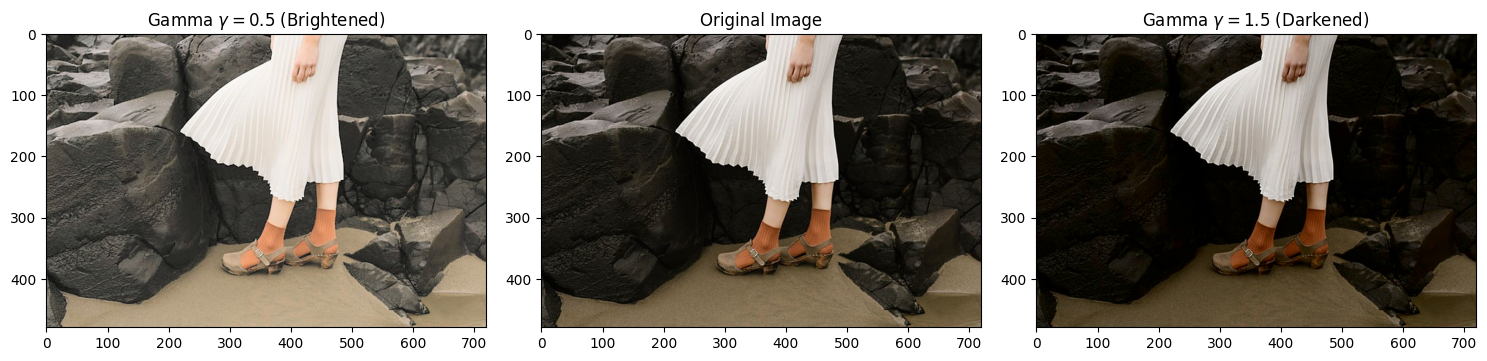

In [104]:
# Convert the image to L*a*b* color space
lab_image = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)

# Split the image into L, A, and B channels
L, A, B = cv2.split(lab_image)

# Normalize L channel to [0, 1] range
L_norm = L / 255.0

# Apply gamma correction with gamma = 0.5 (brightens the image)
gamma_bright = 0.5
L_bright = np.uint8(np.power(L_norm, gamma_bright) * 255)

# Apply gamma correction with gamma = 1.5 (darkens the image)
gamma_dark = 1.5
L_dark = np.uint8(np.power(L_norm, gamma_dark) * 255)

# Merge corrected L channels back with A and B, then convert to RGB
lab_dark = cv2.merge((L_dark, A, B))
lab_bright = cv2.merge((L_bright, A, B))
img_dark = cv2.cvtColor(lab_dark, cv2.COLOR_LAB2BGR)
img_bright = cv2.cvtColor(lab_bright, cv2.COLOR_LAB2BGR)

# Plot original and gamma-corrected images side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 7))

# Display the images
axs[0].imshow(cv2.cvtColor(img_bright, cv2.COLOR_BGR2RGB))
axs[0].set_title("Gamma $\gamma = 0.5$ (Brightened)")

axs[1].imshow(cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB))
axs[1].set_title("Original Image")

axs[2].imshow(cv2.cvtColor(img_dark, cv2.COLOR_BGR2RGB))
axs[2].set_title("Gamma $\gamma = 1.5$ (Darkened)")

plt.tight_layout()
plt.show()


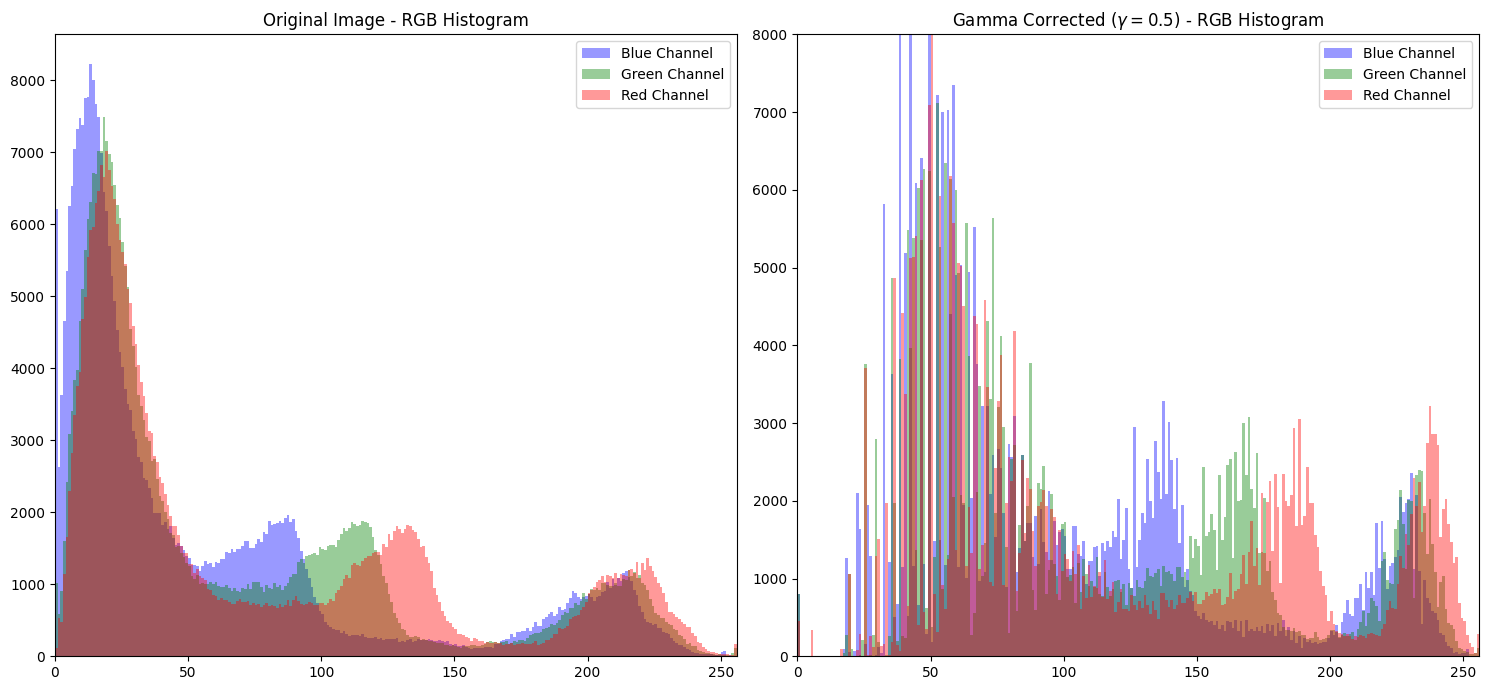

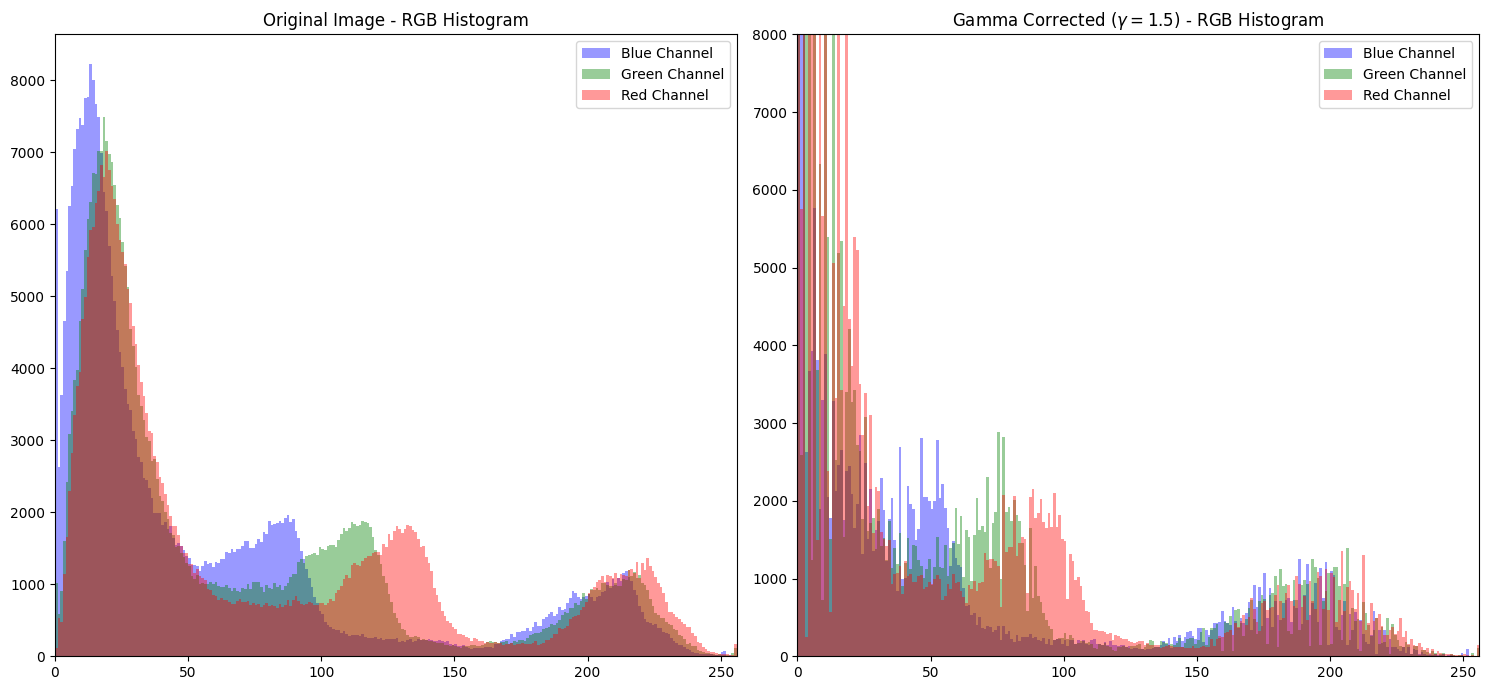

In [117]:
# Create subplots for original and gamma-corrected image histograms
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Original image histograms (RGB channels)
axs[0].set_title("Original Image - RGB Histogram")
axs[0].hist(bgr_img[:, :, 0].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.4, label='Blue Channel')
axs[0].hist(bgr_img[:, :, 1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.4, label='Green Channel')
axs[0].hist(bgr_img[:, :, 2].ravel(), bins=256, range=(0, 256), color='red', alpha=0.4, label='Red Channel')
axs[0].set_xlim([0, 256])
axs[0].legend()

# Gamma-corrected image histograms (RGB channels)
axs[1].set_title("Gamma Corrected ($\gamma = 0.5$) - RGB Histogram")
axs[1].hist(img_bright[:, :, 0].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.4, label='Blue Channel')
axs[1].hist(img_bright[:, :, 1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.4, label='Green Channel')
axs[1].hist(img_bright[:, :, 2].ravel(), bins=256, range=(0, 256), color='red', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  # Limit y-axis to avoid zero dominance
axs[1].legend()

# Show the figure with adjusted layout
plt.tight_layout()
plt.show()

# Create another figure for gamma-corrected images with gamma = 1.5
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

# Histogram for the original image's RGB channels (same as before)
axs[0].set_title("Original Image - RGB Histogram")
axs[0].hist(bgr_img[:, :, 0].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.4, label='Blue Channel')
axs[0].hist(bgr_img[:, :, 1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.4, label='Green Channel')
axs[0].hist(bgr_img[:, :, 2].ravel(), bins=256, range=(0, 256), color='red', alpha=.4, label='Red Channel')
axs[0].set_xlim([0, 256])
axs[0].legend()

# Gamma-corrected image histograms (Gamma = 1.5)
axs[1].set_title("Gamma Corrected ($\gamma = 1.5$) - RGB Histogram")
axs[1].hist(img_dark[:, :, 0].ravel(), bins=256, range=(0, 256), color='blue', alpha=0.4, label='Blue Channel')
axs[1].hist(img_dark[:, :, 1].ravel(), bins=256, range=(0, 256), color='green', alpha=0.4, label='Green Channel')
axs[1].hist(img_dark[:, :, 2].ravel(), bins=256, range=(0, 256), color='red', alpha=0.4, label='Red Channel')
axs[1].set_xlim([0, 256])
axs[1].set_ylim([0, 8000])  # Set y-axis limit to avoid zero dominance
axs[1].legend()

# Show the figure with adjusted layout
plt.tight_layout()
plt.show()


```markdown
### Q04
```

Image shape: (438, 780, 3)


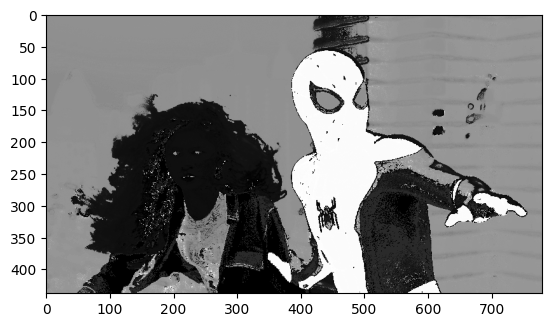

In [119]:
# Load the Spider-Man image
spiderman_img = cv2.imread("a1images/spider.png")

# Convert the image to HSV color space
hsv_img = cv2.cvtColor(spiderman_img, cv2.COLOR_BGR2HSV)

# Get the shape of the HSV image
image_shape = hsv_img.shape
print("Image shape:", image_shape)
plt.imshow(hsv_img[:,:,0], cmap="gray")

In [122]:
def vibrancy_transformation_pixel(input_pixel_value: int, a: float, sigma: int = 70):
    x = input_pixel_value
    return min(x + a * 128 * math.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255)


In [121]:
# Extract the hue, saturation, and value planes from the HSV image
hue_plane = hsv_img[:, :, 0]
saturation_plane = hsv_img[:, :, 1]
value_plane = hsv_img[:, :, 2]

# Print the minimum and maximum values for each plane
print(f"Min and Max of Hue Plane: {np.min(hue_plane)}, {np.max(hue_plane)}")
print(f"Min and Max of Saturation Plane: {np.min(saturation_plane)}, {np.max(saturation_plane)}")
print(f"Min and Max of Value Plane: {np.min(value_plane)}, {np.max(value_plane)}")


Min and Max of Hue Plane: 0, 179
Min and Max of Saturation Plane: 0, 185
Min and Max of Value Plane: 8, 231


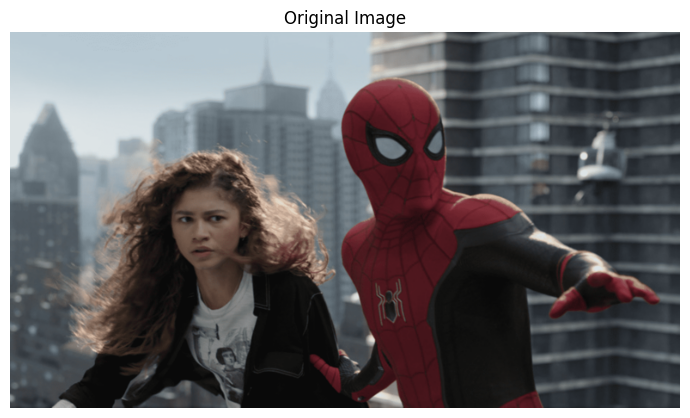

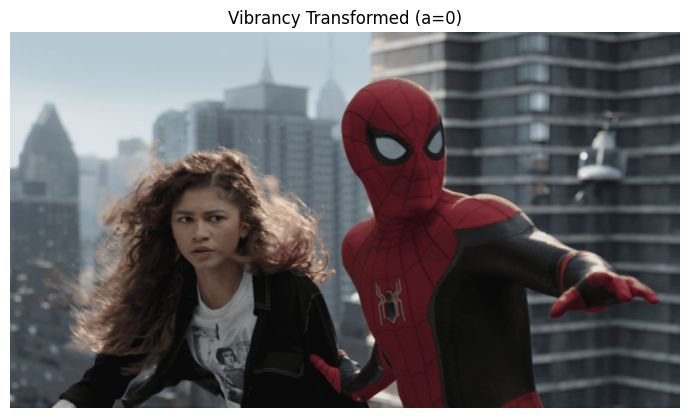

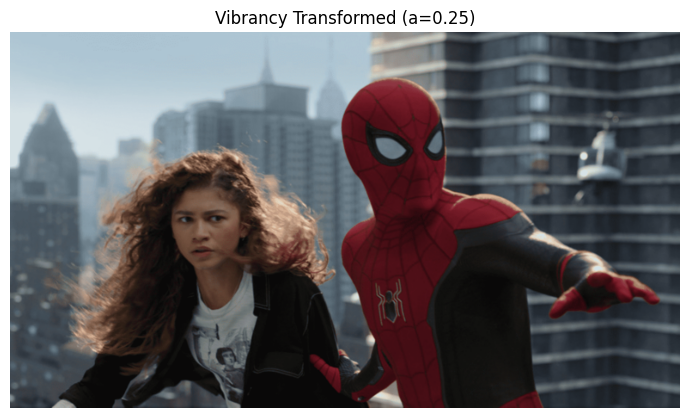

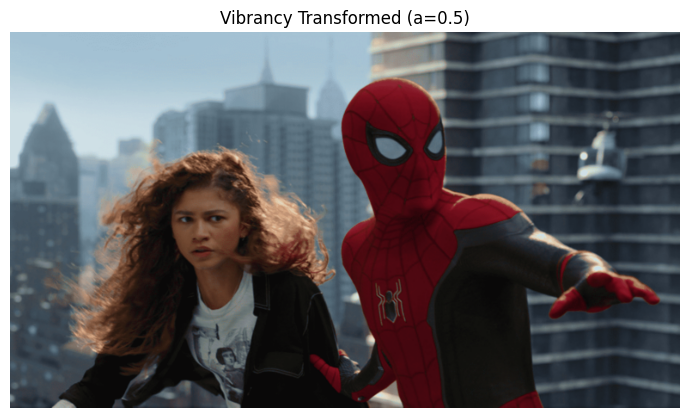

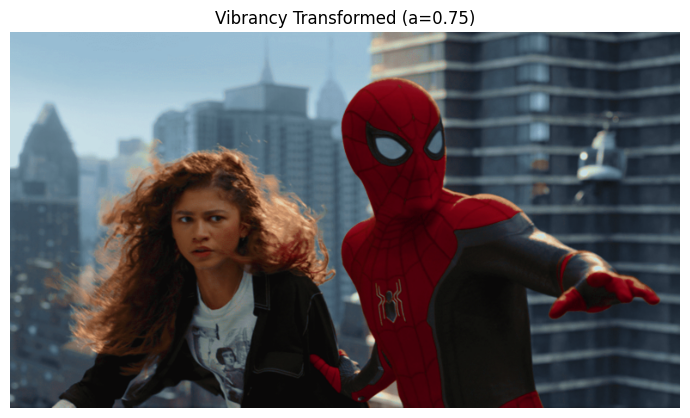

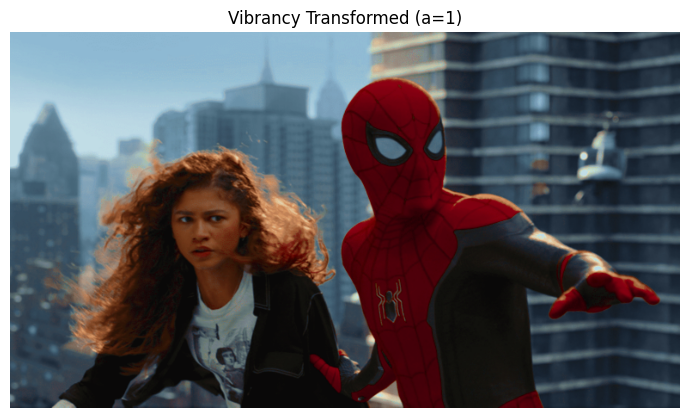

In [132]:
# Dictionary to store images for different vibrancy factors
hsv_images = {0: None, 0.25: None, 0.5: None, 0.75: None, 1: None}

# Plot the original image once
fig, ax = plt.subplots(figsize=(7, 5))  
ax.set_title("Original Image")
ax.imshow(cv2.cvtColor(spiderman_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.tight_layout()
plt.show()

# Loop through the vibrancy factors
for a in hsv_images.keys():
    # Initialize a new saturation plane
    new_saturation_plane = np.zeros(saturation_plane.shape, dtype=np.uint8)

    # Apply vibrancy transformation to each pixel in the saturation plane
    for i in range(saturation_plane.shape[0]):
        for j in range(saturation_plane.shape[1]):
            new_saturation_plane[i, j] = vibrancy_transformation_pixel(saturation_plane[i, j], a=a)

    # Combine the new saturation plane with the original hue and value planes
    new_hsv_img = cv2.merge((hue_plane, new_saturation_plane, value_plane))

    # Convert the image back to BGR color space
    new_spiderman_img = cv2.cvtColor(new_hsv_img, cv2.COLOR_HSV2BGR)

    # Store the transformed image in the dictionary
    hsv_images[a] = new_spiderman_img

    # Plot the vibrancy transformed image
    fig, ax = plt.subplots(figsize=(7, 5))  
    ax.set_title(f"Vibrancy Transformed (a={a})")
    ax.imshow(cv2.cvtColor(new_spiderman_img, cv2.COLOR_BGR2RGB))
    plt.axis('off')  
    plt.tight_layout()
    plt.show()

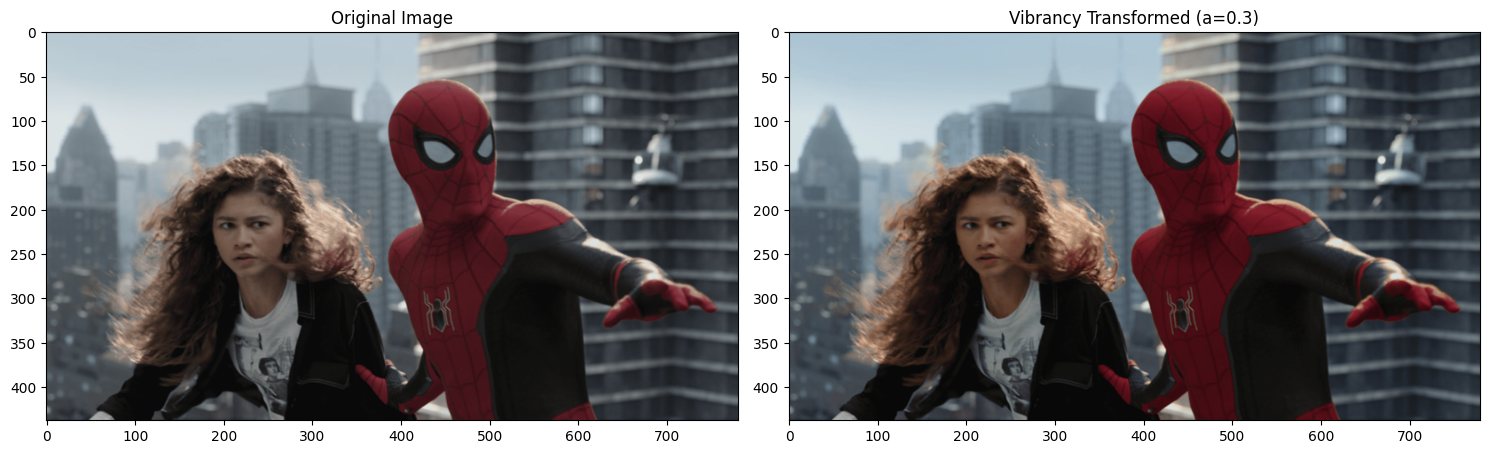

In [137]:
# Set the vibrancy factor as it gives a visually pleasing result
a = 0.3 

# Initialize a new saturation plane
new_saturation_plane = np.zeros(saturation_plane.shape, dtype=np.uint8)

# Apply vibrancy transformation to each pixel in the saturation plane
for i in range(saturation_plane.shape[0]):
    for j in range(saturation_plane.shape[1]):
        new_saturation_plane[i, j] = vibrancy_transformation_pixel(saturation_plane[i, j], a=a)

# Combine the new saturation plane with the original hue and value planes
new_hsv_img = cv2.merge((hue_plane, new_saturation_plane, value_plane))

# Convert the image back to BGR color space
new_spiderman_img = cv2.cvtColor(new_hsv_img, cv2.COLOR_HSV2BGR)

# Store the transformed image in the dictionary
hsv_images[a] = new_spiderman_img

# Create subplots for visualization
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Plot the original image on the first subplot
axs[0].set_title("Original Image")
axs[0].imshow(cv2.cvtColor(spiderman_img, cv2.COLOR_BGR2RGB))

# Plot the vibrancy transformed image on the second subplot
axs[1].set_title(f"Vibrancy Transformed (a={a})")
axs[1].imshow(cv2.cvtColor(new_spiderman_img, cv2.COLOR_BGR2RGB))

# Display the plots
plt.tight_layout()
plt.show()


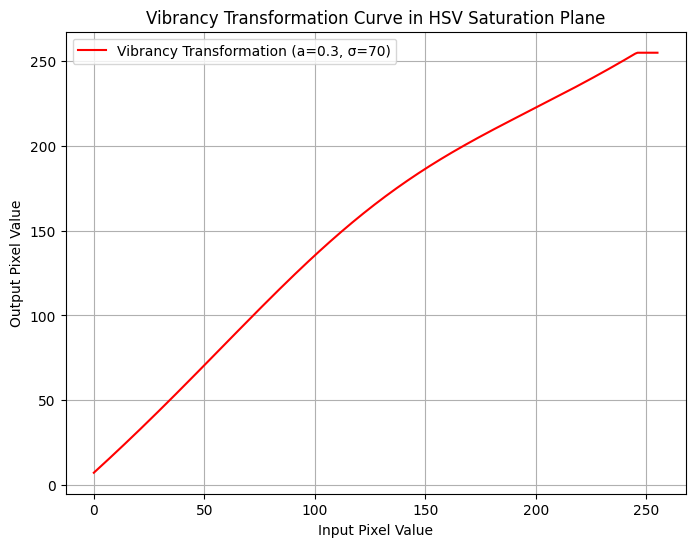

In [139]:
# Set the transformation parameters
a = 0.3

# Generate input pixel values from 0 to 255
input_values = np.arange(256)

# Apply the vibrancy transformation to each pixel value
output_values = [vibrancy_transformation_pixel(x, a) for x in input_values]

# Plot the transformation curve
plt.figure(figsize=(8, 6))
plt.plot(input_values, output_values, label=f'Vibrancy Transformation (a={a}, σ={70})', color='red')
plt.xlabel('Input Pixel Value')
plt.ylabel('Output Pixel Value')
plt.title('Vibrancy Transformation Curve in HSV Saturation Plane')
plt.legend()
plt.grid(True)
plt.show()


```markdown
### Q05
```

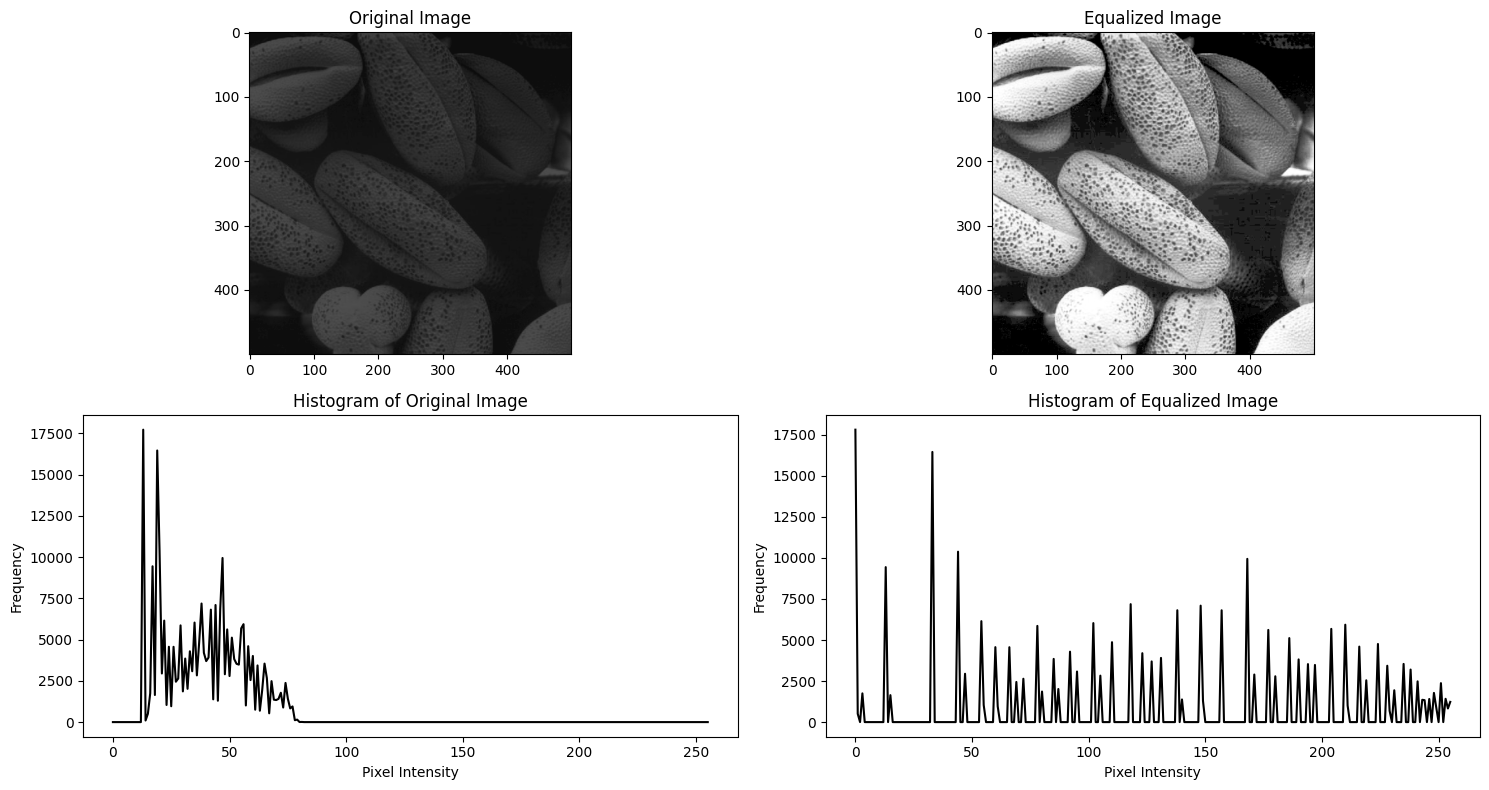

In [144]:
def histogram_equalization(image_path):
    # Load the original image
    original_img = cv2.imread(image_path)
    
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Compute the histogram of the original image
    hist_original, bins_original = np.histogram(img.flatten(), 256, [0, 256])
    
    # Apply histogram equalization
    img_equalized = cv2.equalizeHist(img)
    
    # Compute the histogram of the equalized image
    hist_equalized, bins_equalized = np.histogram(img_equalized.flatten(), 256, [0, 256])
    
    # Plot the original and equalized images
    plt.figure(figsize=(15, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    
    plt.subplot(2, 2, 2)
    plt.imshow(img_equalized, cmap='gray')
    plt.title('Equalized Image')
    
    # Plot the histograms
    plt.subplot(2, 2, 3)
    plt.plot(hist_original, color='black')
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(2, 2, 4)
    plt.plot(hist_equalized, color='black')
    plt.title('Histogram of Equalized Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

histogram_equalization("a1images/shells.tif")

```markdown
### Q06
```

Shape of jeniffer_img:  (2160, 3840, 3)


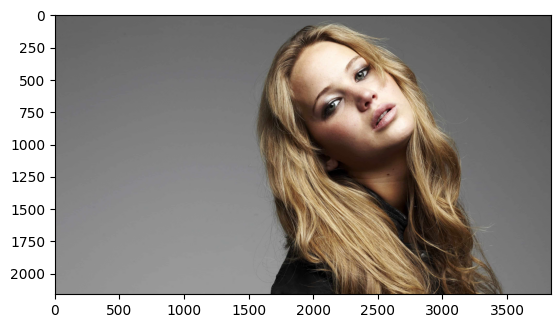

In [146]:
jeniffer_img = cv2.imread("a1images/jeniffer.jpg")
print('Shape of jeniffer_img: ',jeniffer_img.shape)
plt.imshow(cv2.cvtColor(jeniffer_img, cv2.COLOR_BGR2RGB))

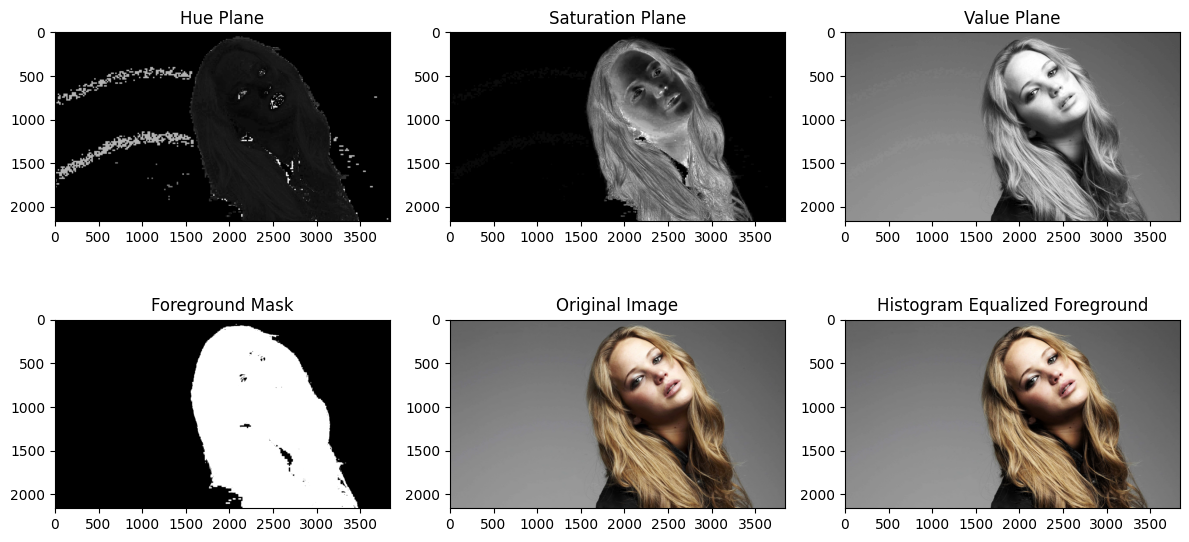

In [165]:
def histogram_equalization_foreground(image_path):
    # Load the image
    img = cv2.imread(image_path)
    
    # Convert the image to HSV color space
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Split the HSV image into hue, saturation, and value planes
    h, s, v = cv2.split(hsv_img)
    
    # Display the hue, saturation, and value planes in grayscale
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(h, cmap='gray')
    plt.title('Hue Plane')
    
    plt.subplot(2, 3, 2)
    plt.imshow(s, cmap='gray')
    plt.title('Saturation Plane')
    
    plt.subplot(2, 3, 3)
    plt.imshow(v, cmap='gray')
    plt.title('Value Plane')
    
    # Threshold the saturation plane to create a binary mask
    _, mask = cv2.threshold(s, 15, 255, cv2.THRESH_BINARY)
    
    # Display the mask
    plt.subplot(2, 3, 4)
    plt.imshow(mask, cmap='gray')
    plt.title('Foreground Mask')
    
    # Extract the foreground using the mask
    foreground_v = cv2.bitwise_and(v, v, mask=mask)
    
    # Compute the histogram of the foreground
    hist_foreground, bins_foreground = np.histogram(foreground_v.flatten(), 256, [0, 256])
    
    # Compute the cumulative sum of the histogram
    cdf = np.cumsum(hist_foreground)
    
    # Normalize the cumulative sum
    cdf_normalized = cdf * hist_foreground.max() / cdf.max()
    
    # Apply histogram equalization to the foreground
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')
    equalized_foreground_v = cdf[foreground_v]
    
    # Combine the equalized value plane with the original hue and saturation planes
    equalized_hsv = cv2.merge([h, s, equalized_foreground_v])
    equalized_img = cv2.cvtColor(equalized_hsv, cv2.COLOR_HSV2BGR)
    
    # Extract the background from the original image using the inverse of the mask
    background = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))
    
    # Combine the background with the histogram-equalized foreground
    result = cv2.add(background, equalized_img)
    
    # Display the original image and the result
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    
    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Histogram Equalized Foreground')
    
    plt.tight_layout()
    plt.show()

histogram_equalization_foreground("a1images/jeniffer.jpg")

```markdown
### Q07
```

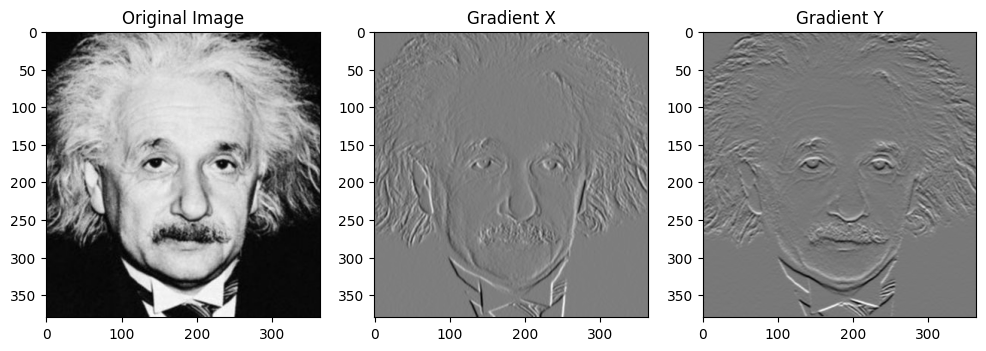

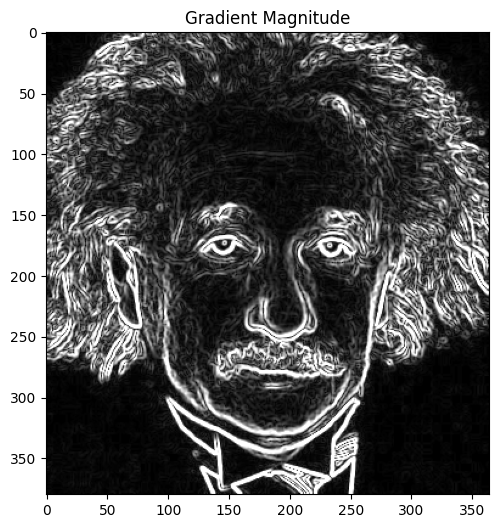

In [163]:
# Load the image in grayscale
img = cv2.imread("a1images/einstein.png", cv2.IMREAD_GRAYSCALE)
 
# Define Sobel kernels
sobel_x = np.array([[1, 0, -1], 
                    [2, 0, -2],
                    [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], 
                    [0, 0, 0], 
                    [-1, -2, -1]])
    
 # Apply Sobel filter using filter2D
grad_x = cv2.filter2D(img, cv2.CV_64F, sobel_x)
grad_y = cv2.filter2D(img, cv2.CV_64F, sobel_y)
    
# Compute the gradient magnitude
grad = np.sqrt(grad_x**2 + grad_y**2)
grad = cv2.convertScaleAbs(grad)
    
# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
    
plt.subplot(1, 3, 2)
plt.imshow(grad_x, cmap='gray')
plt.title('Gradient X')
    
plt.subplot(1, 3, 3)
plt.imshow(grad_y, cmap='gray')
plt.title('Gradient Y')
    
plt.figure(figsize=(6, 6))
plt.imshow(grad, cmap='gray')
plt.title('Gradient Magnitude')
plt.show()

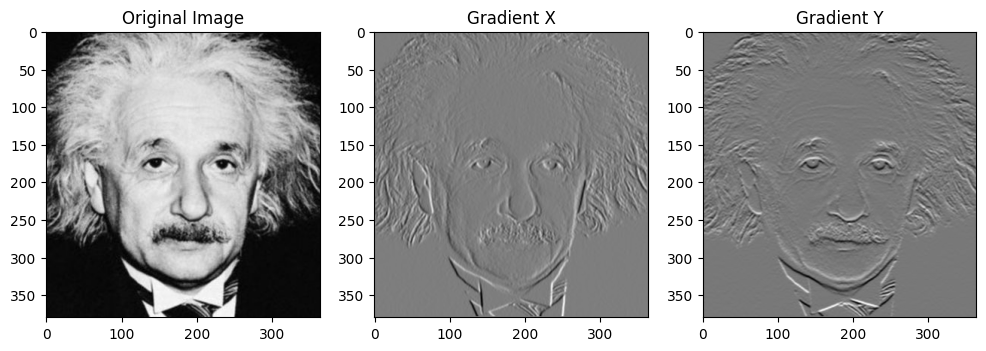

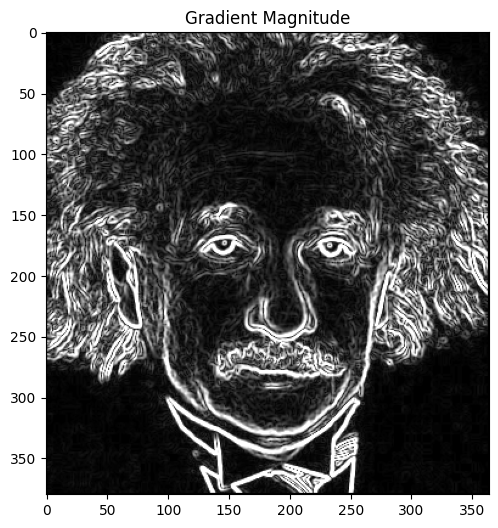

In [166]:
def sobel_filter_manual(image_path):
    # Load the image in grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Define Sobel kernels
    sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    # Get image dimensions
    rows, cols = img.shape
    
    # Initialize gradient images
    grad_x = np.zeros_like(img, dtype=np.float64)
    grad_y = np.zeros_like(img, dtype=np.float64)
    
    # Apply Sobel filter manually
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            region = img[i-1:i+2, j-1:j+2]
            grad_x[i, j] = np.sum(region * sobel_x)
            grad_y[i, j] = np.sum(region * sobel_y)
    
    # Compute the gradient magnitude
    grad = np.sqrt(grad_x**2 + grad_y**2)
    grad = cv2.convertScaleAbs(grad)
    
    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original Image')
    
    plt.subplot(1, 3, 2)
    plt.imshow(grad_x, cmap='gray')
    plt.title('Gradient X')
    
    plt.subplot(1, 3, 3)
    plt.imshow(grad_y, cmap='gray')
    plt.title('Gradient Y')
    
    plt.figure(figsize=(6, 6))
    plt.imshow(grad, cmap='gray')
    plt.title('Gradient Magnitude')
    plt.show()

sobel_filter_manual("a1images/einstein.png")

: 